# DecisionTree

## 모듈 불러오기

In [1]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, log_loss
from sklearn.preprocessing import StandardScaler, Binarizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 테스트 데이터 10개로 분할

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np


num_splits = 10

train_test_indices = []

for i in range(num_splits):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    train_test_indices.append((X_train, X_test, y_train, y_test))

for i, (X_train, X_test, y_train, y_test) in enumerate(train_test_indices):
    print("Split ", i+1, X_train.shape,X_test.shape,y_train.shape,y_test.shape)
    globals()['X_test_{}'.format(i)]  = pd.concat([X_train, X_test], axis = 0)
    globals()['y_test_{}'.format(i)]  = pd.concat([y_train, y_test], axis = 0)

if train_test_indices[0] == train_test_indices[1]:
  print('o')

NameError: ignored

In [ ]:
for i in range(10):
     globals()['X_test_{}'.format(i)].to_csv('X_test_'+str(i+1)+'.csv')
     globals()['y_test_{}'.format(i)].to_csv('y_test_'+str(i+1)+'.csv')


## 데이터 불러오기

In [3]:
test = pd.read_csv('test_179378.csv')
train = pd.read_csv('train_538132.csv')
validation = pd.read_csv('validation_179377.csv')

train = train.drop(['Unnamed: 0'], axis=1)
val = validation.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)

df_train = pd.concat([pd.concat([train,val],axis = 0),test],axis=0)

test = pd.read_csv('preprocessed_test.csv')
X_test_1 = pd.read_csv('X_test_1.csv',index_col = 0)
y_test_1 = pd.read_csv('y_test_1.csv',index_col = 0)

X_test_2 = pd.read_csv('X_test_2.csv',index_col = 0)
y_test_2 = pd.read_csv('y_test_2.csv',index_col = 0)

X_test_3 = pd.read_csv('X_test_3.csv',index_col = 0)
y_test_3 = pd.read_csv('y_test_3.csv',index_col = 0)

X_test_4 = pd.read_csv('X_test_4.csv',index_col = 0)
y_test_4 = pd.read_csv('y_test_4.csv',index_col = 0)

X_test_5 = pd.read_csv('X_test_5.csv',index_col = 0)
y_test_5 = pd.read_csv('y_test_5.csv',index_col = 0)

X= test.drop(['target'],axis=1)
y = test['target']


## 모델 학습

In [4]:
X_train = df_train.drop(['depvar'],axis=1)
y_train = df_train['depvar']
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=20).fit(X_train,y_train)


In [5]:
predict_1= dt.predict(X_test_1)
predict_2= dt.predict(X_test_2)
predict_3= dt.predict(X_test_3)
predict_4= dt.predict(X_test_4)
predict_5= dt.predict(X_test_5)


In [6]:

for i in range(1,6):
    
    accuracy = accuracy_score(globals()['y_test_{}'.format(i)], globals()['predict_{}'.format(i)])
    precision = precision_score(globals()['y_test_{}'.format(i)], globals()['predict_{}'.format(i)])
    recall = recall_score(globals()['y_test_{}'.format(i)], globals()['predict_{}'.format(i)])
    conf_matrix = confusion_matrix(globals()['y_test_{}'.format(i)], globals()['predict_{}'.format(i)])
    print('{0}번째 데이터셋 \n 정확도: {1}, 정밀도도: {2}, 재현율율: {3}'.format(i,accuracy, precision, recall))
    print(conf_matrix)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1번째 데이터셋 
 정확도: 0.839130483300414, 정밀도도: 0.0, 재현율율: 0.0
[[150394      0]
 [ 28832      0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2번째 데이터셋 
 정확도: 0.839130483300414, 정밀도도: 0.0, 재현율율: 0.0
[[150394      0]
 [ 28832      0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3번째 데이터셋 
 정확도: 0.839130483300414, 정밀도도: 0.0, 재현율율: 0.0
[[150394      0]
 [ 28832      0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4번째 데이터셋 
 정확도: 0.839130483300414, 정밀도도: 0.0, 재현율율: 0.0
[[150394      0]
 [ 28832      0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5번째 데이터셋 
 정확도: 0.839130483300414, 정밀도도: 0.0, 재현율율: 0.0
[[150394      0]
 [ 28832      0]]


## 확률로 확인

In [7]:
y_pred_proba = []
for i in range(1,6):
    pred_proba = dt.predict_proba(globals()['X_test_{}'.format(i)])
    y_pred_proba.append(pred_proba)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


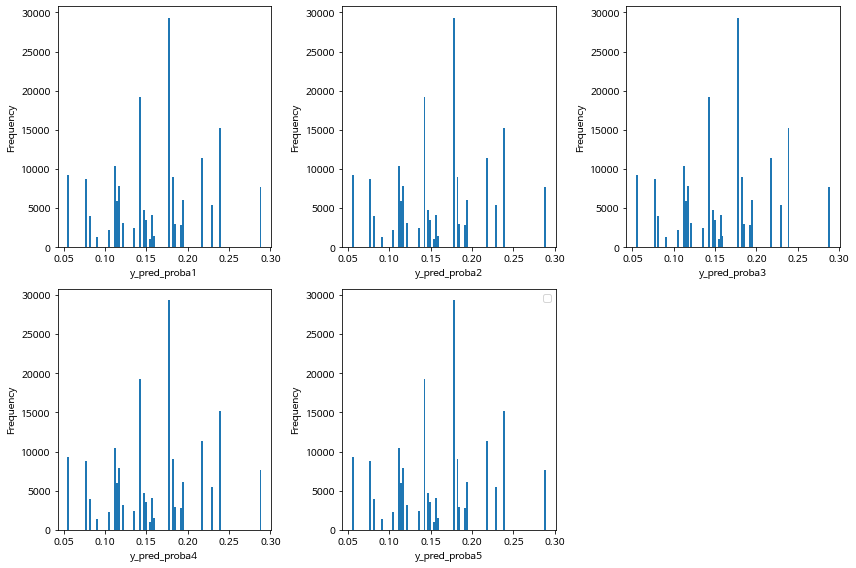

In [8]:
plt.figure(figsize=(12,8))
for i in range(5):
    
    plt.subplot(2, 3, i+1)                # nrows=2, ncols=1, index=1
    plt.hist(y_pred_proba[i][:,1], bins=100)
    

    plt.xlabel('y_pred_proba'+str(i+1))
    plt.ylabel('Frequency')

plt.legend()
plt.tight_layout()
#plt.savefig("%s_opt_threshold_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
y_pred_proba[4]

## Threshold 확인

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


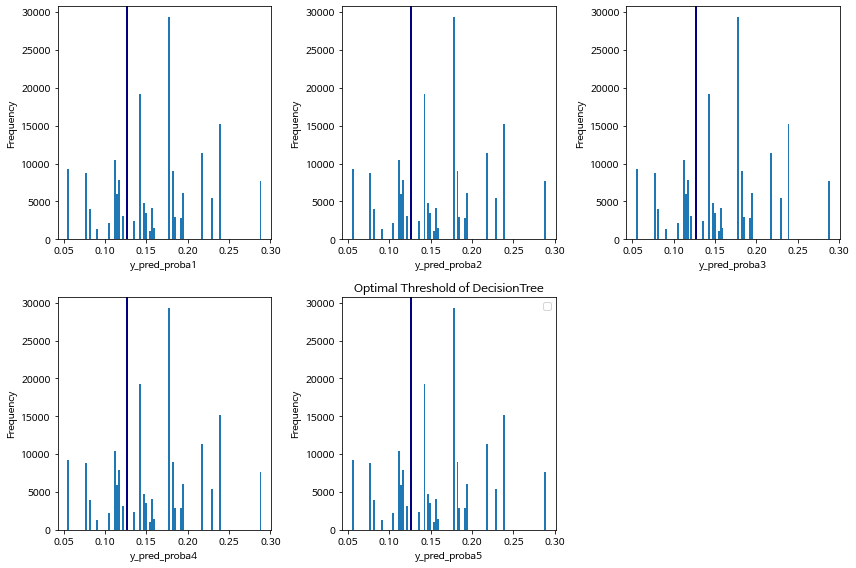

In [9]:
OPT_threshold=0.12666666666666668

plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(2, 3, i+1)                # nrows=2, ncols=1, index=1
    plt.hist(y_pred_proba[i][:,1], bins=100)
    plt.axvline(x=OPT_threshold, color='navy', linewidth=2)

    plt.xlabel('y_pred_proba'+str(i+1))
    plt.ylabel('Frequency')


plt.title('Optimal Threshold of DecisionTree')

plt.legend()
plt.tight_layout()
#plt.savefig("%s_opt_threshold_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

In [10]:
def test_func(y_test, y_pred_proba, opt_threshold,model_name):
        
    # make Binarizer(y hat)
    binarizer = Binarizer(threshold = opt_threshold).fit(y_pred_proba[:,1].reshape(-1,1))
    custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

    # count 0, 1 in Binarizer(y hat)
    unique, counts = np.unique(custom_predict, return_counts=True)

    for val, count in zip(unique, counts):
        if len(unique) == 1:
            if val == 1.0:
                num_0_pred = count
                num_1_pred = 0
            elif val == 0.0:
                num_1_pred = count
                num_0_pred = 0
        if val == 1.0:
            num_0_pred = count
        elif val == 0.0:
            num_1_pred = count

    # count 0, 1 in y hat
    num_1_real = y_test.value_counts()[0]
    num_0_real = y_test.value_counts()[1]

    tn, fp, fn, tp = confusion_matrix(y_test, custom_predict).ravel()
    count = [tn, fp, fn, tp]
    tn_, fp_, fn_, tp_ = [round(x/sum(count)*100, 1) for x in count]

    accuracy = round((tp+tn)/(tp+tn+fp+fn),4)
    precision = round(tp/(tp+fp),4)
    recall = round(tp/(tp+fn),4)
    f1 = round(2*(precision*recall)/(precision+recall),4)
    
    result_df = pd.DataFrame(index=['1_real','1_pred','0_real','0_pred','tn', 'fp', 'fn', 'tp', 'tn_%', 'fp_%', 'fn_%', 'tp_%', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

    result_df['result'] = [num_1_real, num_1_pred, num_0_real, num_0_pred, tn, fp, fn, tp, tn_, fp_, fn_, tp_, accuracy, precision, recall, f1]

    labels = ['TN','FP','FN','TP']


    # 혼동 행렬 시각화
    labels = ['Positive', 'Negative']
    cm = [[tp, fn], [fp, tn]]

    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Acutual Class')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_title('%s Confusion Matrix'%(model_name))
    
    ax.text(0.45, 1.40, 'FP', fontsize=12, color='red')
    ax.text(1.45, 1.40, 'TN', fontsize=12, color='red')
    ax.text(0.45, 0.40, 'TP', fontsize=12, color='red')
    ax.text(1.45, 0.40, 'FN', fontsize=12, color='red')
    
    #plt.savefig("%s_Confusion_Matrix_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
    plt.show()
    
    result_df.T.to_csv('%s_test.csv'%(model_name), index=True)

    return result_df.T

In [11]:
test_func(y_test, y_pred_proba, OPT_threshold,'DecisionTree')

NameError: name 'y_test' is not defined

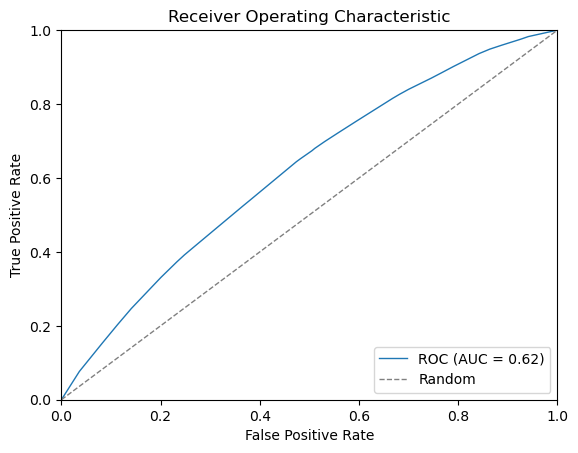

In [ ]:
# Generate ROC curve and AUC score for the validation set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1, label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## i 번째 데이터 셋 확률로 확인하기

In [ ]:
y_pred_proba[4]

array([[0.76179332, 0.23820668],
       [0.82201809, 0.17798191],
       [0.84138699, 0.15861301],
       ...,
       [0.76188404, 0.23811596],
       [0.81558785, 0.18441215],
       [0.76179332, 0.23820668]])

In [ ]:
y_pred_proba[3]

array([[0.8425174 , 0.1574826 ],
       [0.85219516, 0.14780484],
       [0.92295863, 0.07704137],
       ...,
       [0.9225525 , 0.0774475 ],
       [0.76179332, 0.23820668],
       [0.9454581 , 0.0545419 ]])

In [14]:
for j in range(len(y_pred_proba)):
    globals()['final_predict_{}'.format(j)]=[]
    for i in range(len(y_pred_proba[j])):
        if y_pred_proba[j][:,1][i]<OPT_threshold:
            globals()['final_predict_{}'.format(j)].append(0)
        else:
            globals()['final_predict_{}'.format(j)].append(1)



In [17]:
for i in range(5):
    
    accuracy = accuracy_score(globals()['y_test_{}'.format(i+1)], globals()['final_predict_{}'.format(i)])
    precision = precision_score(globals()['y_test_{}'.format(i+1)], globals()['final_predict_{}'.format(i)])
    recall = recall_score(globals()['y_test_{}'.format(i+1)], globals()['final_predict_{}'.format(i)])
    f1 = f1_score(globals()['y_test_{}'.format(i+1)], globals()['final_predict_{}'.format(i)])
    conf_matrix = confusion_matrix(globals()['y_test_{}'.format(i+1)], globals()['final_predict_{}'.format(i)])
    print('{0}번째 데이터셋 \n 정확도: {1}, 정밀도도: {2}, 재현율율: {3}, f1: {4}'.format(i+6,accuracy, precision, recall, f1))
    print(conf_matrix)

6번째 데이터셋 
 정확도: 0.40003124546661756, 정밀도도: 0.18857142857142858, 재현율율: 0.8263734739178691, f1: 0.30707169645964094
[[ 47870 102524]
 [  5006  23826]]
7번째 데이터셋 
 정확도: 0.40003124546661756, 정밀도도: 0.18857142857142858, 재현율율: 0.8263734739178691, f1: 0.30707169645964094
[[ 47870 102524]
 [  5006  23826]]
8번째 데이터셋 
 정확도: 0.40003124546661756, 정밀도도: 0.18857142857142858, 재현율율: 0.8263734739178691, f1: 0.30707169645964094
[[ 47870 102524]
 [  5006  23826]]
9번째 데이터셋 
 정확도: 0.40003124546661756, 정밀도도: 0.18857142857142858, 재현율율: 0.8263734739178691, f1: 0.30707169645964094
[[ 47870 102524]
 [  5006  23826]]
10번째 데이터셋 
 정확도: 0.40003124546661756, 정밀도도: 0.18857142857142858, 재현율율: 0.8263734739178691, f1: 0.30707169645964094
[[ 47870 102524]
 [  5006  23826]]
